<a href="https://colab.research.google.com/github/DataCommanderUsher/Google-Data-Analytics-Case-Study-1-How-does-a-bike-share-navigate-speedy-success-/blob/main/Case_study_1_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*   **Author** : Usher Dube
*   **Date** : 18 Dec 2025
*   **Description**: Google Data Analytics Case Study 1 How does a bike share navigate speedy success as accroding to Google Data anayltics course in cousera

In [ ]:
install.packages("bigrquery")
install.packages("tidyverse")
install.packages("ggplot2")
install.packages("scales")

In [ ]:
library(bigrquery)
library(tidyverse)
library(ggplot2)
library(scales)

In [3]:
bq_auth()

Is it OK to cache OAuth access credentials in the folder ~/.cache/gargle
between R sessions?
1: Yes
2: No


Selection: 1


Please point your browser to the following url: 

https://accounts.google.com/o/oauth2/v2/auth?client_id=603366585132-frjlouoa3s2ono25d2l9ukvhlsrlnr7k.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fbigquery%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fcloud-platform%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&redirect_uri=https%3A%2F%2Fwww.tidyverse.org%2Fgoogle-callback%2F&response_type=code&state=ebbcf1a9b66a56824ea43f86e2d4dedc&access_type=offline&prompt=consent



Enter authorization code: eyJjb2RlIjoiNC8wQVRYODdsT0FSZ0RfUjg0TlgybWQtakpsSXNuV3hfVWZ6b0ZROGVSWmNjVmRCZkQ4Zld5LWhSZHFDOVBnZHRUbjhWakhuZyIsInN0YXRlIjoiZWJiY2YxYTliNjZhNTY4MjRlYTQzZjg2ZTJkNGRlZGMifQ==


In [4]:
project_id <- "cyclistic-analysis-2025"
sql_query <- "SELECT * FROM `cyclistic_2025.cleaned_trips`"

In [5]:
t <- bq_project_query(project_id, sql_query)
df <- bq_table_download(t)

In [6]:
head(df)
nrow(df)

ride_id,rideable_type,started_at,ended_at,start_station_name,end_station_name,member_casual,ride_length_seconds,day_of_week
<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<int>,<int>
A584F206C1CA3123,classic_bike,2025-08-13 06:42:37,2025-08-13 06:50:59,Wabash Ave & 16th St,Federal St & Polk St,member,501,4
F1B0665954811DDC,classic_bike,2025-08-13 06:37:00,2025-08-13 06:45:34,Dearborn Pkwy & Delaware Pl,Clinton St & Lake St,member,514,4
7D11791E5B58F1C7,classic_bike,2025-08-13 06:28:20,2025-08-13 06:30:42,Desplaines St & Kinzie St,Kingsbury St & Kinzie St,member,142,4
06C94614B5C946DD,classic_bike,2025-08-13 06:27:40,2025-08-13 07:03:16,Burling St & Diversey Pkwy,Burling St & Diversey Pkwy,member,2136,4
7E7A3EEF00C64A93,classic_bike,2025-08-13 06:26:29,2025-08-13 06:30:46,Canal St & Monroe St,LaSalle St & Jackson Blvd,member,257,4
D3E7E14606F7560F,classic_bike,2025-08-13 06:25:06,2025-08-13 06:35:21,Princeton Ave & Garfield Blvd,DuSable Museum,member,614,4


[1] 5442919

In [7]:
#Create month column name
df$started_at <- as.POSIXct(df$started_at)
df$month_name <- format(df$started_at, "%B")
head(df)

ride_id,rideable_type,started_at,ended_at,start_station_name,end_station_name,member_casual,ride_length_seconds,day_of_week,month_name
<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<int>,<int>,<chr>
A584F206C1CA3123,classic_bike,2025-08-13 06:42:37,2025-08-13 06:50:59,Wabash Ave & 16th St,Federal St & Polk St,member,501,4,August
F1B0665954811DDC,classic_bike,2025-08-13 06:37:00,2025-08-13 06:45:34,Dearborn Pkwy & Delaware Pl,Clinton St & Lake St,member,514,4,August
7D11791E5B58F1C7,classic_bike,2025-08-13 06:28:20,2025-08-13 06:30:42,Desplaines St & Kinzie St,Kingsbury St & Kinzie St,member,142,4,August
06C94614B5C946DD,classic_bike,2025-08-13 06:27:40,2025-08-13 07:03:16,Burling St & Diversey Pkwy,Burling St & Diversey Pkwy,member,2136,4,August
7E7A3EEF00C64A93,classic_bike,2025-08-13 06:26:29,2025-08-13 06:30:46,Canal St & Monroe St,LaSalle St & Jackson Blvd,member,257,4,August
D3E7E14606F7560F,classic_bike,2025-08-13 06:25:06,2025-08-13 06:35:21,Princeton Ave & Garfield Blvd,DuSable Museum,member,614,4,August


In [8]:
#Chnage DAY and month to actual values
df$day_of_week <- factor(df$day_of_week,
                         levels = c(1, 2, 3, 4, 5, 6, 7),
                         labels = c("Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"))

df$month_name <- factor(df$month_name,
                        levels = c("January", "February", "March", "April", "May", "June",
                                   "July", "August", "September", "October", "November", "December"))

In [9]:
head(df)

ride_id,rideable_type,started_at,ended_at,start_station_name,end_station_name,member_casual,ride_length_seconds,day_of_week,month_name
<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<int>,<fct>,<fct>
A584F206C1CA3123,classic_bike,2025-08-13 06:42:37,2025-08-13 06:50:59,Wabash Ave & 16th St,Federal St & Polk St,member,501,Wednesday,August
F1B0665954811DDC,classic_bike,2025-08-13 06:37:00,2025-08-13 06:45:34,Dearborn Pkwy & Delaware Pl,Clinton St & Lake St,member,514,Wednesday,August
7D11791E5B58F1C7,classic_bike,2025-08-13 06:28:20,2025-08-13 06:30:42,Desplaines St & Kinzie St,Kingsbury St & Kinzie St,member,142,Wednesday,August
06C94614B5C946DD,classic_bike,2025-08-13 06:27:40,2025-08-13 07:03:16,Burling St & Diversey Pkwy,Burling St & Diversey Pkwy,member,2136,Wednesday,August
7E7A3EEF00C64A93,classic_bike,2025-08-13 06:26:29,2025-08-13 06:30:46,Canal St & Monroe St,LaSalle St & Jackson Blvd,member,257,Wednesday,August
D3E7E14606F7560F,classic_bike,2025-08-13 06:25:06,2025-08-13 06:35:21,Princeton Ave & Garfield Blvd,DuSable Museum,member,614,Wednesday,August


In [10]:
#Understand our dataset
summary_stats <- df %>%
  group_by(member_casual) %>%
  summarise(
    average_ride_length_min = mean(ride_length_seconds) / 60,
    median_ride_length_min = median(ride_length_seconds) / 60,
    max_ride_length_min = max(ride_length_seconds) / 60,
    total_rides = n()
  )

print(summary_stats, width = Inf)

# A tibble: 2 × 5
  member_casual average_ride_length_min median_ride_length_min
  <chr>                           <dbl>                  <dbl>
1 casual                           23.5                  11.9 
2 member                           12.5                   8.72
  max_ride_length_min total_rides
                <dbl>       <int>
1               1575.     1930302
2               1500.     3512617


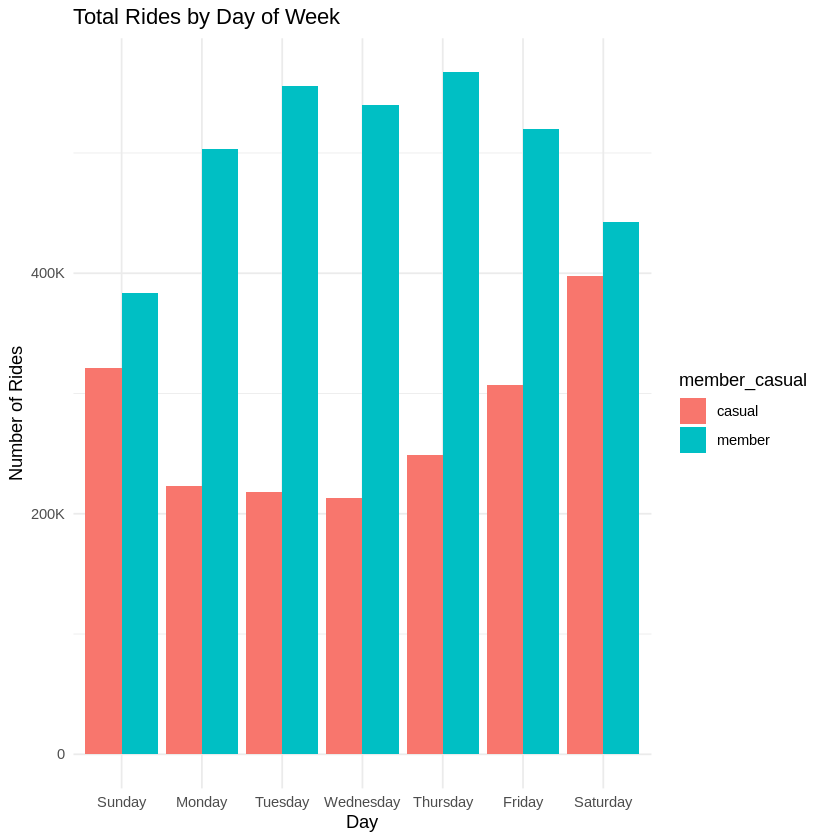

In [11]:
v1 <- df %>%
  group_by(member_casual, day_of_week) %>%
  summarise(number_of_rides = n(), .groups="drop") %>%
  ggplot(aes(x = day_of_week, y = number_of_rides, fill = member_casual)) +
  geom_col(position = "dodge") +
  scale_y_continuous(labels = label_number(scale_cut = cut_short_scale())) +
  labs(title = "Total Rides by Day of Week", x = "Day", y = "Number of Rides") +
  theme_minimal()
print(v1)

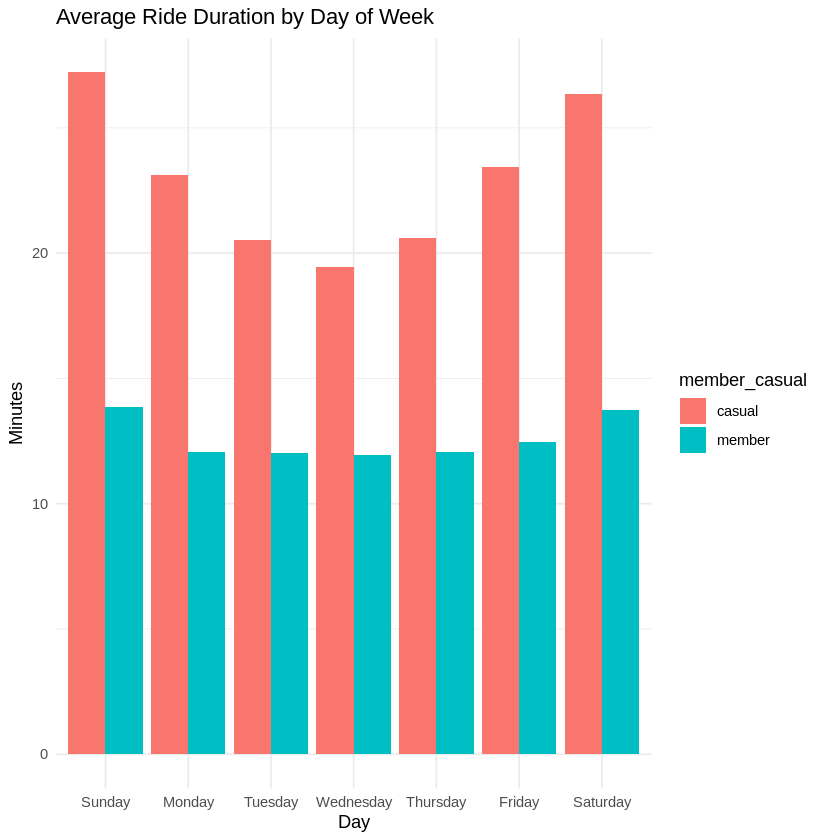

In [12]:
#Average Duration (Behavior)
v2 <- df %>%
  group_by(member_casual, day_of_week) %>%
  summarise(average_duration = mean(ride_length_seconds) / 60, .groups="drop") %>%
  ggplot(aes(x = day_of_week, y = average_duration, fill = member_casual)) +
  geom_col(position = "dodge") +
  labs(title = "Average Ride Duration by Day of Week", x = "Day", y = "Minutes") +
  theme_minimal()
print(v2)

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


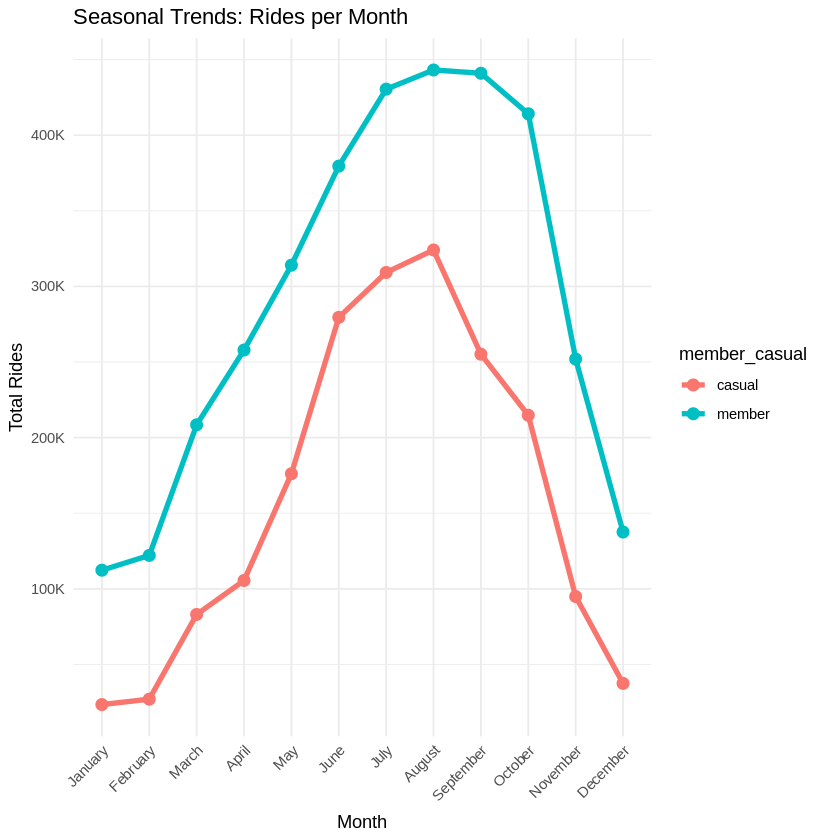

In [13]:
# Visual 3: Monthly Seasonality
v3 <- df %>%
  group_by(member_casual, month_name) %>%
  summarise(number_of_rides = n(), .groups="drop") %>%
  ggplot(aes(x = month_name, y = number_of_rides, group = member_casual, color = member_casual)) +
  geom_line(size = 1.5) +
  geom_point(size = 3) +
  scale_y_continuous(labels = label_number(scale_cut = cut_short_scale())) +
  labs(title = "Seasonal Trends: Rides per Month", x = "Month", y = "Total Rides") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

print(v3)

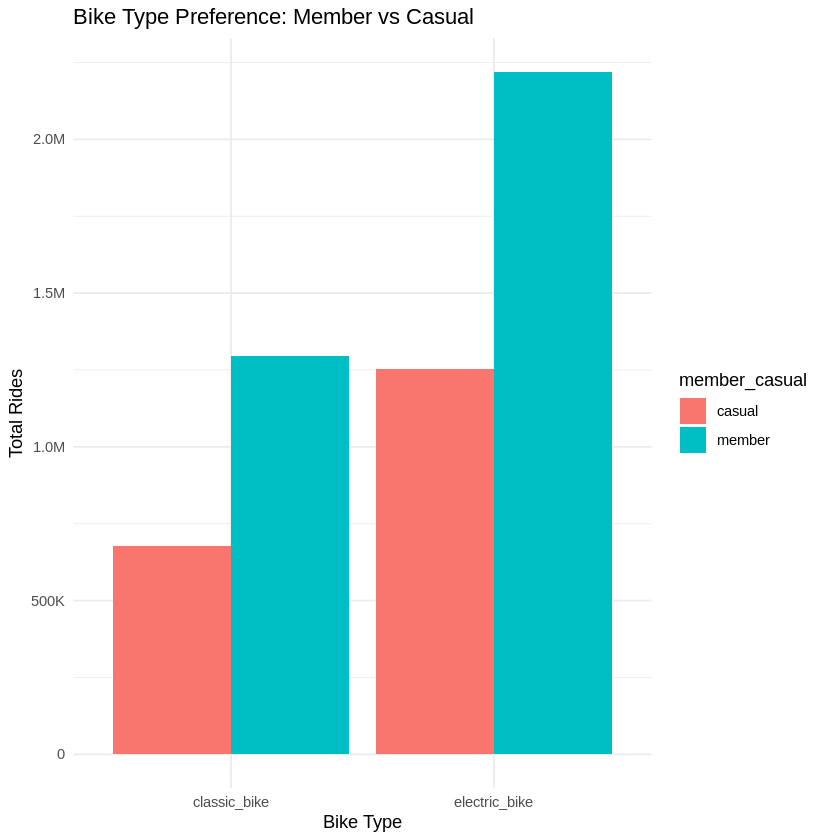

In [17]:
#Bike Type Preference
v4 <- df %>%
  group_by(member_casual, rideable_type) %>%
  summarise(number_of_rides = n(), .groups="drop") %>%
  ggplot(aes(x = rideable_type, y = number_of_rides, fill = member_casual)) +
  geom_col(position = "dodge") +
  scale_y_continuous(labels = label_number(scale_cut = cut_short_scale())) +
  labs(title = "Bike Type Preference: Member vs Casual", x = "Bike Type", y = "Total Rides") +
  theme_minimal()

print(v4)